<a href="https://colab.research.google.com/github/arthurziegler/pytorch-deep-learning-course/blob/main/Notebooks/Boston_Housing_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
#Get the data
!wget -nc https://lazyprogrammer.me/course_files/exercises/boston.txt

File ‘boston.txt’ already there; not retrieving.



In [64]:
#Load the data
data = pd.read_csv('boston.txt', delim_whitespace=True, skiprows = 22, header = None)

In [65]:
data.head

<bound method NDFrame.head of              0      1      2    3      4   ...    6       7    8      9     10
0       0.00632  18.00   2.31  0.0  0.538  ...  65.2  4.0900  1.0  296.0  15.3
1     396.90000   4.98  24.00  NaN    NaN  ...   NaN     NaN  NaN    NaN   NaN
2       0.02731   0.00   7.07  0.0  0.469  ...  78.9  4.9671  2.0  242.0  17.8
3     396.90000   9.14  21.60  NaN    NaN  ...   NaN     NaN  NaN    NaN   NaN
4       0.02729   0.00   7.07  0.0  0.469  ...  61.1  4.9671  2.0  242.0  17.8
...         ...    ...    ...  ...    ...  ...   ...     ...  ...    ...   ...
1007  396.90000   5.64  23.90  NaN    NaN  ...   NaN     NaN  NaN    NaN   NaN
1008    0.10959   0.00  11.93  0.0  0.573  ...  89.3  2.3889  1.0  273.0  21.0
1009  393.45000   6.48  22.00  NaN    NaN  ...   NaN     NaN  NaN    NaN   NaN
1010    0.04741   0.00  11.93  0.0  0.573  ...  80.8  2.5050  1.0  273.0  21.0
1011  396.90000   7.88  11.90  NaN    NaN  ...   NaN     NaN  NaN    NaN   NaN

[1012 rows x 11 colum

Looking at the data we can see that the imported .txt file is quite messy. The data points came divided into two rows which needs to be corrected in order for our training to take place.

In [66]:
# Put the rows that have the first columns into a df and the ones with the last columns in another
first_columns = data.iloc[::2]
first_columns.reset_index(inplace=True, drop=True)

last_columns = data.iloc[1::2]
last_columns.reset_index(inplace=True, drop=True)

In [67]:
# Join the two dfs so that each data point is now correctly in a single row
data_clean = first_columns.join(last_columns, rsuffix = '_inc')
data_clean = data_clean.iloc[:, 0:14] # Take only 14 first columns which are the ones with data on them
data_clean.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data_clean

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [78]:
# Reshape the data into X and Y
X = data_clean.values[:, 0:13].reshape(-1, 13)
Y = data_clean.values[:, 13].reshape(-1, 1)

In [79]:
data_clean.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

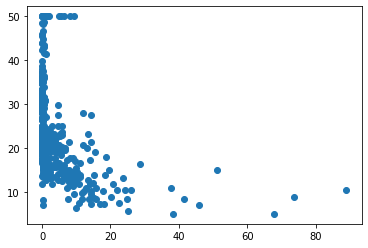

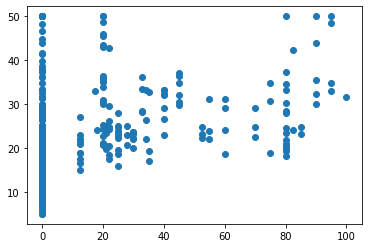

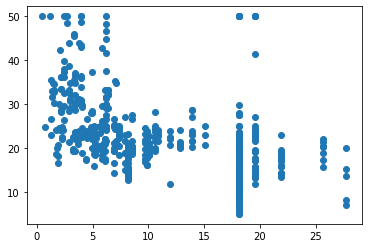

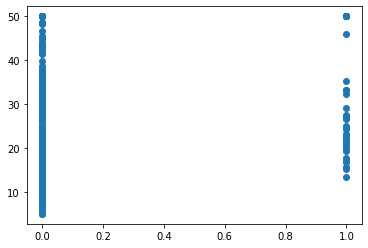

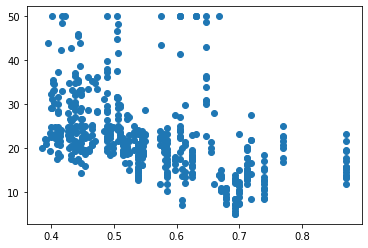

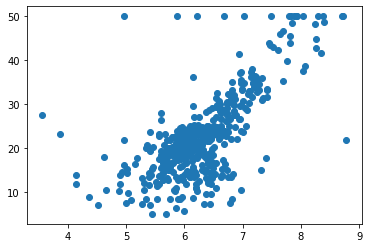

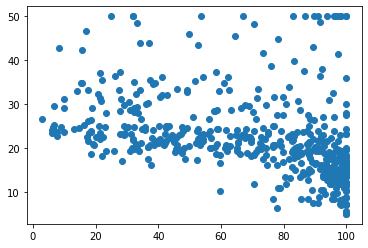

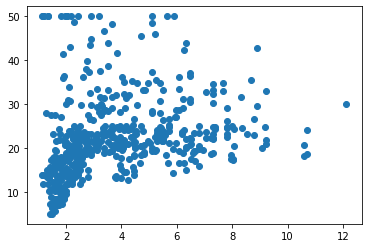

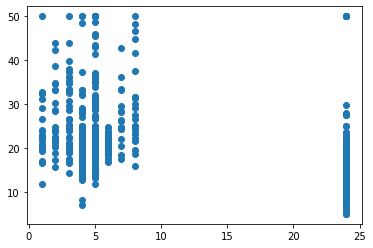

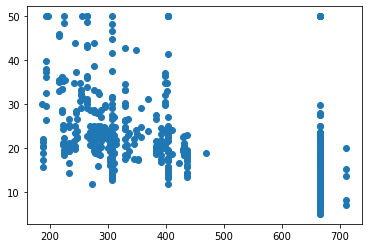

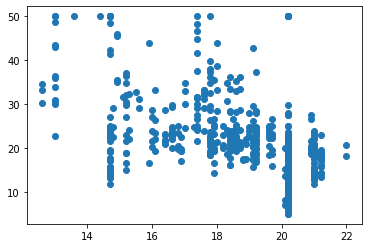

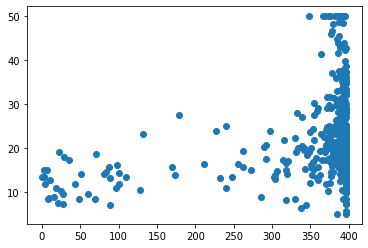

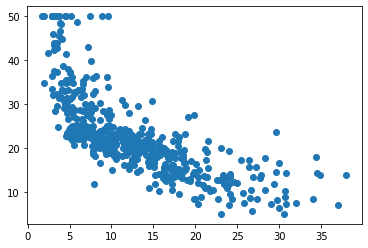

In [90]:
for index in range(13):
    X_feature = X[:, index]
    plt.scatter(X_feature, Y)
    plt.show()

In [109]:
X_RM = X[:, 5].reshape(-1, 1)

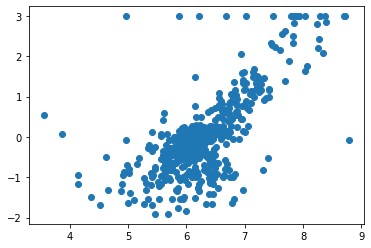

In [110]:
plt.scatter(X_RM, Y)

In [111]:
# Scale and center both the x and y axes
mx = X_RM.mean()
sx = X_RM.std()
my = Y.mean()
sy = Y.std()
X_RM = (X_RM - mx)/sx
Y = (Y - my)/sy

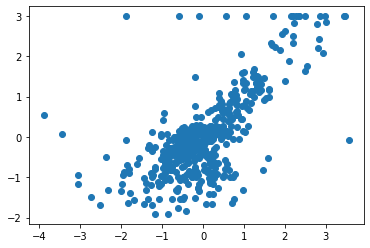

In [112]:
plt.scatter(X_RM, Y)

In [113]:
X_RM = X_RM.astype(np.float32)
Y = Y.astype(np.float32)

In [129]:
# Create the linear regression model
model = nn.Linear(1, 1)

In [130]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [131]:
inputs = torch.from_numpy(X_RM)
targets = torch.from_numpy(Y)

In [132]:
type(inputs)

torch.Tensor

In [133]:
#Train the model
n_epochs = 300
losses = []

for it in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Record loss in the list
    losses.append(loss.item())

    # Backward and optimize
    loss.backward()
    optimizer.step()

    print(f'Epoch {it+1}/{n_epochs}, Loss {loss.item():.4f}')


Epoch 1/300, Loss 1.9243
Epoch 2/300, Loss 1.8685
Epoch 3/300, Loss 1.8150
Epoch 4/300, Loss 1.7636
Epoch 5/300, Loss 1.7142
Epoch 6/300, Loss 1.6668
Epoch 7/300, Loss 1.6212
Epoch 8/300, Loss 1.5775
Epoch 9/300, Loss 1.5355
Epoch 10/300, Loss 1.4951
Epoch 11/300, Loss 1.4563
Epoch 12/300, Loss 1.4191
Epoch 13/300, Loss 1.3834
Epoch 14/300, Loss 1.3491
Epoch 15/300, Loss 1.3161
Epoch 16/300, Loss 1.2844
Epoch 17/300, Loss 1.2540
Epoch 18/300, Loss 1.2248
Epoch 19/300, Loss 1.1968
Epoch 20/300, Loss 1.1698
Epoch 21/300, Loss 1.1439
Epoch 22/300, Loss 1.1191
Epoch 23/300, Loss 1.0952
Epoch 24/300, Loss 1.0723
Epoch 25/300, Loss 1.0503
Epoch 26/300, Loss 1.0292
Epoch 27/300, Loss 1.0089
Epoch 28/300, Loss 0.9894
Epoch 29/300, Loss 0.9706
Epoch 30/300, Loss 0.9526
Epoch 31/300, Loss 0.9354
Epoch 32/300, Loss 0.9188
Epoch 33/300, Loss 0.9029
Epoch 34/300, Loss 0.8876
Epoch 35/300, Loss 0.8729
Epoch 36/300, Loss 0.8587
Epoch 37/300, Loss 0.8452
Epoch 38/300, Loss 0.8322
Epoch 39/300, Loss 0.

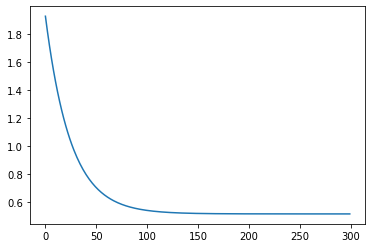

In [136]:
# Loss per iteration
plt.plot(losses);

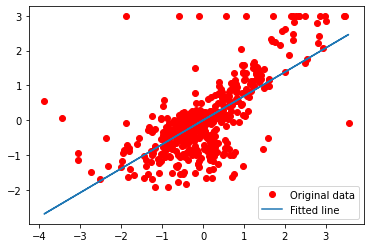

In [138]:
# Plot the graph
predicted = model(torch.from_numpy(X_RM)).detach().numpy()
plt.plot(X_RM, Y, 'ro', label='Original data')
plt.plot(X_RM, predicted, label='Fitted line')
plt.legend()
plt.show()